For $N_\text{ant}$ antennas, we have $N_\text{bl} = \frac{N_\text{ant}(N_\text{ant}-1)}{2}$ cross pairs. Each antenna has two polarization feeds, so the whole cross pairs are $2\times4\times\frac{N_\text{ant}(N_\text{ant}-1)}{2}$ (all are complex values). And the total to-be-determined gain terms are $2\times4\times N_\text{ant}$.

\begin{align}
\left[\begin{array}{cc}
     V^{xx,\text{obs}} &  V^{xy,\text{obs}}\\
     V^{yx,\text{obs}} &  V^{yy,\text{obs}} 
\end{array}\right]_{ij} = 
\left[\begin{array}{cc}
   g^x &  d^{xy}\\
     d^{yx} &  g^y 
\end{array}\right]_{i}
\left[\begin{array}{cc}
   V^{xx} &  V^{xy}\\
     V^{yx} &  V^{yy} 
\end{array}\right]_{ij}
\left[\begin{array}{cc}
   g^{x*} &  d^{yx*}\\
     d^{xy*} &  g^{y*} 
\end{array}\right]
\end{align}

\begin{align}
\left[\begin{array}{c}
     V^{xx,\text{obs}}_{ij} \\V^{xy,\text{obs}}_{ij}\\
     V^{yx,\text{obs}}_{ij} \\ V^{yy,\text{obs}}_{ij} 
\end{array}\right] = 
\left[\begin{array}{cccc}
   g^x_i g_j^{x*} &  g_i^x d_j^{xy*} & d_i^{xy}g_j^{x*} & d_i^{xy} d_j^{xy*}\\
     g_i^x d_j^{yx*} & g_i^x g_j^{y*} & d_i^{xy} d_j^{yx*} & d_i^{xy} g_j^{y*} \\ 
      d_i^{yx} g_j^{x*} & d_i^{yx} d_j^{xy*} & g_i^y g_j^{x*} & g_i^y d_j^{xy*}  \\ 
       d_i^{yx} d_j^{yx*} & d_i^{yx} g_j^{y*} &  
       g_i^y d_j^{yx*} & g_i^y g_i^{y*} 
\end{array}\right]
\left[\begin{array}{c}
     V^{xx}_{ij} \\V^{xy}_{ij}\\
     V^{yx}_{ij} \\ V^{yy}_{ij} 
\end{array}\right]
\end{align}

real_data (Nbls, 4) np.complex
obs_data (Nbls, 4) np.complex
gain (Nants, 4) np.complex

In pyuvdata, $N_{bl} = N_{ant}(N_{ant}-1)/2 + N_{ant}$. In calibration, we only consider the cross-antenna-baselines. Thus we have $N_{ant}(N_{ant}-1)$ cross pairs (include their conjugates)

In [1]:
import numpy as np

In [2]:
N_ant = 6

In [3]:
ants = range(N_ant)

In [4]:
bls = []
for i in ants:
    for j in ants:
        if j!=i:
            bls.append((i,j))

In [5]:
print(bls)

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 0), (1, 2), (1, 3), (1, 4), (1, 5), (2, 0), (2, 1), (2, 3), (2, 4), (2, 5), (3, 0), (3, 1), (3, 2), (3, 4), (3, 5), (4, 0), (4, 1), (4, 2), (4, 3), (4, 5), (5, 0), (5, 1), (5, 2), (5, 3), (5, 4)]


M is the sky coherency

In [6]:
sky = {}
for i in range(N_ant):
    for j in range(i+1, N_ant):
        M = np.zeros((2,2)).astype(np.complex128)
        M[0,0] = (1.+np.random.normal(0,0.1))*np.exp(-1.j*2*np.pi*np.random.rand(1)[0])
        M[1,1] = (1.+np.random.normal(0,0.1))*np.exp(-1.j*2*np.pi*np.random.rand(1)[0])
        M[0,1] = (np.random.normal(0,0.1))*np.exp(-1.j*2*np.pi*np.random.rand(1)[0])
        M[1,0] = (np.random.normal(0,0.1))*np.exp(-1.j*2*np.pi*np.random.rand(1)[0])
        sky[(i,j)] = M
        sky[(j,i)] = np.transpose(np.conj(M))

G is the gain

In [7]:
gain = {}
for ant in range(N_ant):
    G = np.zeros((2,2)).astype(np.complex128)
    G[0,0] = (1.+np.random.normal(0,0.1))*np.exp(-1.j*2*np.pi*np.random.rand(1)[0])
    G[1,1] = (1.+np.random.normal(0,0.1))*np.exp(-1.j*2*np.pi*np.random.rand(1)[0])
    G[0,1] = (np.random.normal(0,0.1))*np.exp(-1.j*2*np.pi*np.random.rand(1)[0])
    G[1,0] = (np.random.normal(0,0.1))*np.exp(-1.j*2*np.pi*np.random.rand(1)[0])
    gain[ant] = G

In [8]:
gain_H = {}
for ant in range(N_ant):
    gain_H[ant] = np.transpose(np.conj(gain[ant]))

In [9]:
for ant in range(N_ant):
    print(gain[ant])

[[-0.69333563-7.61735836e-01j -0.06034986-8.06408235e-03j]
 [-0.01738047+6.80015870e-04j -0.73396395+7.30577747e-01j]]
[[ 0.73362676+0.83040841j  0.02919923-0.00931481j]
 [-0.00221967+0.02389666j  0.21684174-0.9785179j ]]
[[-0.7057609 +0.53375694j -0.02090003+0.03033805j]
 [-0.02372769+0.08190564j  0.51679057-0.92564933j]]
[[ 0.84466077+0.39151184j  0.01172398+0.00781216j]
 [ 0.08285521-0.04542325j -0.2499791 -0.8707743j ]]
[[-0.98317439+0.54777211j  0.10343044+0.17810461j]
 [-0.06101006+0.02891698j -0.42436301+0.78461902j]]
[[ 0.62463689+0.72552577j  0.00466361+0.01449237j]
 [-0.03016365-0.15570416j  0.47735297-0.80812695j]]


N is noise

In [10]:
noise = {}
for bl in bls:
    noise[bl] = np.random.normal(0,0.01,(2,2)) + 1.j*np.random.normal(0,0.01,(2,2))

D is data

In [11]:
data = {}
for bl in bls:
    data[bl] = np.matmul(gain[bl[0]], np.matmul(sky[bl], np.transpose(np.conj(gain[bl[1]]))))

In [12]:
def Wirtinger_lmfit(model, data, ants, diagonalize=False, Niteration=100):
    """
    Using Newton-Gauss method to minimize \sum{D_[ij]-G_i M_{ij} G_j^H} and obtain G, where D, G and M are all 2*2 matrix. 
    Algorithm: G_{k+1} = [J(G_k)^H J(G_k)]^{-1} * J(G_k)^H * D, where J is the Jacobian matrix. 
    
    Parameters
    ----------
    
    model : dict 
        model of sky coherency
    
    data : dict
    
    ants : dict
        
    Returns
    -------
    
    gain : dict
        calibration gains
        
    residual : 
    
    """
    
    gain_prev = {}
    for ant in ants:
        gain_prev[ant] = np.array([[1,0],[0,1]])
    gain_H_prev = {}
    for ant in ants:
        gain_H_prev[ant] = np.transpose(np.conj(gain_prev[ant]))
    residual = np.zeros(Niteration)

    gain_next, gain_H_next = {},{}
    for iteration in range(Niteration):
        for ant in ants:
            JH_J = np.zeros((2,2)).astype(np.complex128)
            JH_D = np.zeros((2,2)).astype(np.complex128)
            for q in ants:
                if q != ant:
                    JH_J += np.matmul(model[(ant,q)], np.matmul(gain_H_prev[q], np.matmul(gain_prev[q], model[(q,ant)])))
                    JH_D += np.matmul(data[(ant,q)], np.matmul(gain_prev[q], model[(q, ant)]))
            if diagonalize==True:
                gain_next[ant] = np.diag(np.diag(np.matmul(JH_D, np.linalg.inv(JH_J))))
            else:
                gain_next[ant] = np.matmul(JH_D, np.linalg.inv(JH_J))
            
            JH_J = np.zeros((2,2)).astype(np.complex128)
            JH_D = np.zeros((2,2)).astype(np.complex128)
            for p in ants:
                if p != ant:
                    JH_J += np.matmul(model[(ant,p)], np.matmul(gain_H_prev[p], np.matmul(gain_prev[p], model[(p,ant)])))
                    JH_D += np.matmul(model[(ant,p)], np.matmul(gain_H_prev[p], data[(p, ant)]))
            if diagonalize==True:
                gain_H_next[ant] = np.diag(np.diag(np.matmul(np.linalg.inv(JH_J), JH_D)))
            else:
                gain_H_next[ant] = np.matmul(np.linalg.inv(JH_J), JH_D)
    
        gain_prev = gain_next
        gain_H_prev = gain_H_next
        
        for ant in ants:
            for r in ants:
                if r!= ant:
                     residual[iteration] += np.linalg.norm(data[(ant,r)] - np.matmul(gain_prev[ant], np.matmul(model[(ant,r)], gain_H_prev[r])))
    return gain_prev, residual                    

In [13]:
gain_iteration, residual = Wirtinger_lmfit(sky, data, ants, diagonalize=False, Niteration=1000)

In [15]:
print(residual)

[3.69357149e+01 2.25046047e+01 1.43712747e+01 7.98267848e+00
 6.19849891e+00 6.05414405e+00 6.02825705e+00 6.01540175e+00
 6.00528427e+00 5.99554728e+00 5.98558957e+00 5.97526083e+00
 5.96451290e+00 5.95331863e+00 5.94165621e+00 5.92950571e+00
 5.91684808e+00 5.90366459e+00 5.88993663e+00 5.87564553e+00
 5.86077253e+00 5.84529874e+00 5.82920513e+00 5.81247259e+00
 5.79508190e+00 5.77701381e+00 5.75824910e+00 5.73876860e+00
 5.71855327e+00 5.69758425e+00 5.67584294e+00 5.65331107e+00
 5.62997078e+00 5.60580467e+00 5.58079595e+00 5.55492845e+00
 5.52818676e+00 5.50055631e+00 5.47202346e+00 5.44257560e+00
 5.41220125e+00 5.38089015e+00 5.34863338e+00 5.31542342e+00
 5.28125427e+00 5.24612155e+00 5.21002255e+00 5.17295636e+00
 5.13492392e+00 5.09592811e+00 5.05597378e+00 5.01506786e+00
 4.97321935e+00 4.93043941e+00 4.88674136e+00 4.84214069e+00
 4.79665508e+00 4.75030440e+00 4.70311065e+00 4.65509798e+00
 4.60629260e+00 4.55672274e+00 4.50641858e+00 4.45541217e+00
 4.40373730e+00 4.351429

In [16]:
for i in gain_iteration:
    print(np.abs(gain_iteration[i]))

[[1.03002708 0.06088625]
 [0.01739376 1.03559013]]
[[1.10805521 0.03064899]
 [0.02399952 1.00225627]]
[[0.88487    0.03684031]
 [0.08527331 1.06014111]]
[[0.93098514 0.01408834]
 [0.09448946 0.9059456 ]]
[[1.12547153 0.205959  ]
 [0.06751607 0.89202633]]
[[0.95737082 0.01522426]
 [0.15859897 0.93858139]]


In [17]:
for i in gain:
    print(np.abs(gain[i]))

[[1.03002708 0.06088625]
 [0.01739376 1.03559013]]
[[1.10805521 0.03064899]
 [0.02399952 1.00225627]]
[[0.88487    0.03684031]
 [0.08527331 1.06014111]]
[[0.93098514 0.01408834]
 [0.09448946 0.9059456 ]]
[[1.12547153 0.205959  ]
 [0.06751607 0.89202633]]
[[0.95737082 0.01522426]
 [0.15859897 0.93858139]]


NG method on least squares

In [19]:
max_step = 1000
residual_gain_amp, residual_gain_phs, residual_gain_H_amp, residual_gain_H_phs= np.zeros(max_step),np.zeros(max_step),np.zeros(max_step),np.zeros(max_step)
gain_prev = {}
for ant in range(N_ant):
    gain_prev[ant] = np.array([[1,0],[0,1]])
gain_H_prev = {}
for ant in range(N_ant):
    gain_H_prev[ant] = np.transpose(np.conj(gain_prev[ant]))

gain_next, gain_H_next = {},{}
for step in range(max_step):
    for ant in range(N_ant):
        JH_J = np.zeros((2,2)).astype(np.complex128)
        JH_D = np.zeros((2,2)).astype(np.complex128)
        for q in np.arange(N_ant):
            if q != ant:
                JH_J += np.matmul(sky[(ant,q)], np.matmul(gain_H_prev[q], np.matmul(gain_prev[q], sky[(q,ant)])))
                JH_D += np.matmul(data[(ant,q)], np.matmul(gain_prev[q], sky[(q, ant)]))
        gain_next[ant] = np.matmul(JH_D, np.linalg.inv(JH_J))
        residual_gain_amp[step] += np.linalg.norm(np.abs(gain_next[ant])-np.abs(gain[ant]))
        residual_gain_phs[step] += np.linalg.norm(np.angle(gain_next[ant])-np.angle(gain[ant]))
        JH_J = np.zeros((2,2)).astype(np.complex128)
        JH_D = np.zeros((2,2)).astype(np.complex128)
        for p in np.arange(N_ant):
            if p != ant:
                JH_J += np.matmul(sky[(ant,p)], np.matmul(gain_H_prev[p], np.matmul(gain_prev[p], sky[(p,ant)])))
                JH_D += np.matmul(sky[(ant,p)], np.matmul(gain_H_prev[p], data[(p, ant)]))
        gain_H_next[ant] = np.matmul(np.linalg.inv(JH_J), JH_D)
        residual_gain_H_amp[step] += np.linalg.norm(np.abs(gain_H_next[ant])-np.abs(gain_H[ant]))
        residual_gain_H_phs[step] += np.linalg.norm(np.angle(gain_H_next[ant])-np.angle(gain_H[ant]))
    gain_prev = gain_next
    gain_H_prev = gain_H_next


In [20]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'residuals')

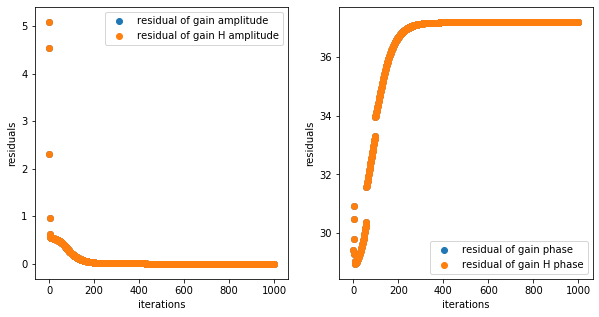

In [21]:
fig, ax = plt.subplots(ncols=2, figsize=(10,5))
ax[0].scatter(range(max_step), residual_gain_amp, label="residual of gain amplitude")
ax[0].scatter(range(max_step), residual_gain_H_amp, label="residual of gain H amplitude")
ax[0].legend(loc='best')
ax[0].set_xlabel("iterations")
ax[0].set_ylabel("residuals")

ax[1].scatter(range(max_step), residual_gain_phs, label="residual of gain phase")
ax[1].scatter(range(max_step), residual_gain_H_phs, label="residual of gain H phase")
ax[1].legend(loc='best')
ax[1].set_xlabel("iterations")
ax[1].set_ylabel("residuals")

In [22]:
for ant in range(N_ant):
    print('ant {} absolute phase:\n origin {} \n iteration {}\n'.format(ant, np.angle(gain[ant]), np.angle(gain_next[ant])))

ant 0 absolute phase:
 origin [[-2.30922093 -3.0087573 ]
 [ 3.1024873   2.35850661]] 
 iteration [[ 1.02222517  0.32268881]
 [ 0.1507481  -0.59323259]]

ant 1 absolute phase:
 origin [[ 0.84719883 -0.30880346]
 [ 1.66341662 -1.35271828]] 
 iteration [[-2.10454038  3.02264265]
 [-1.28832258  1.97872782]]

ant 2 absolute phase:
 origin [[ 2.49408076  2.17403708]
 [ 1.8527728  -1.06160264]] 
 iteration [[-0.45765844 -0.77770212]
 [-1.09896641  2.26984346]]

ant 3 absolute phase:
 origin [[ 0.43403492  0.58777661]
 [-0.50147903 -1.85035522]] 
 iteration [[-2.51770428 -2.36396259]
 [ 2.82996707  1.48109089]]

ant 4 absolute phase:
 origin [[2.63327929 1.04466753]
 [2.69898452 2.06658924]] 
 iteration [[-0.31845991 -1.90707168]
 [-0.25275468 -0.88514996]]

ant 5 absolute phase:
 origin [[ 0.85998305  1.2594636 ]
 [-1.76215013 -1.03725011]] 
 iteration [[-2.09175615 -1.6922756 ]
 [ 1.56929598  2.29419599]]



In [23]:
for ant in range(1,N_ant):
    print('ant (0,{}) relative phase:\n origin {} \n iteration {}\n'.format(ant, np.angle(gain[ant]) - np.angle(gain[0]), np.angle(gain_next[ant]) - np.angle(gain_next[0])))

ant (0,1) relative phase:
 origin [[ 3.15641976  2.69995384]
 [-1.43907068 -3.71122489]] 
 iteration [[-3.12676555  2.69995384]
 [-1.43907068  2.57196042]]

ant (0,2) relative phase:
 origin [[ 4.80330169  5.18279438]
 [-1.24971451 -3.42010925]] 
 iteration [[-1.47988362 -1.10039092]
 [-1.24971451  2.86307605]]

ant (0,3) relative phase:
 origin [[ 2.74325586  3.5965339 ]
 [-3.60396633 -4.20886183]] 
 iteration [[-3.53992945 -2.6866514 ]
 [ 2.67921898  2.07432348]]

ant (0,4) relative phase:
 origin [[ 4.94250022  4.05342483]
 [-0.40350278 -0.29191737]] 
 iteration [[-1.34068508 -2.22976048]
 [-0.40350278 -0.29191737]]

ant (0,5) relative phase:
 origin [[ 3.16920398  4.2682209 ]
 [-4.86463743 -3.39575672]] 
 iteration [[-3.11398132 -2.01496441]
 [ 1.41854788  2.88742858]]



In [24]:
for ant in range(N_ant):
    print('ant {} relative phase between origin and iteration {}\n'.format(ant, np.angle(gain_next[ant]) - np.angle(gain[ant])))

ant 0 relative phase between origin and iteration [[ 3.3314461  3.3314461]
 [-2.9517392 -2.9517392]]

ant 1 relative phase between origin and iteration [[-2.9517392  3.3314461]
 [-2.9517392  3.3314461]]

ant 2 relative phase between origin and iteration [[-2.9517392 -2.9517392]
 [-2.9517392  3.3314461]]

ant 3 relative phase between origin and iteration [[-2.9517392 -2.9517392]
 [ 3.3314461  3.3314461]]

ant 4 relative phase between origin and iteration [[-2.9517392 -2.9517392]
 [-2.9517392 -2.9517392]]

ant 5 relative phase between origin and iteration [[-2.9517392 -2.9517392]
 [ 3.3314461  3.3314461]]

